In [18]:
from keras import models, layers, optimizers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import numpy as np

%matplotlib inline

In [15]:
sample_path = './data/sample'
train_path = './data/train'
validation_path = './data/validation'
test_path = './data/final_evaluation'
# dimensions of our images.
img_width, img_height = 150, 150
target_size = (img_width, img_width)
input_shape = (img_width, img_width, 3)

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 30
batch_size = 16

In [3]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                              horizontal_flip=True,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              fill_mode='nearest'
                             )

test_datagen = ImageDataGenerator(rescale=1./255) #Note that the validation data shouldn’t be augmented!

In [4]:
# sample_images = data_gen.flow_from_directory(directory=sample_path, target_size=target_size, class_mode='binary')
train_images = train_datagen.flow_from_directory(directory=train_path, target_size=target_size, 
                                                 class_mode='binary', batch_size=batch_size)
test_images = test_datagen.flow_from_directory(directory=test_path, target_size=target_size, 
                                                 class_mode='binary', batch_size=batch_size)

Found 15556 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [5]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [6]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
len(model.trainable_weights)

30

In [9]:
conv_base.trainable = False
len(model.trainable_weights)

4

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [11]:
%time
history = model.fit_generator(
    train_images,
    steps_per_epoch=100,
    epochs=30,
    validation_data=test_images,
    validation_steps=50)
model.save('cats-n-dogs_basic_model_transfer_learning_data_augmentation.h5')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.1 µs
Epoch 1/30
100/100 [==============================] - 57s - loss: 0.5131 - acc: 0.7463 - val_loss: 0.3432 - val_acc: 0.8562
Epoch 2/30
100/100 [==============================] - 55s - loss: 0.3317 - acc: 0.8600 - val_loss: 0.2540 - val_acc: 0.8975
Epoch 3/30
100/100 [==============================] - 57s - loss: 0.2609 - acc: 0.8875 - val_loss: 0.1605 - val_acc: 0.9373
Epoch 4/30
100/100 [==============================] - 56s - loss: 0.2339 - acc: 0.9050 - val_loss: 0.1430 - val_acc: 0.9425
Epoch 5/30
100/100 [==============================] - 56s - loss: 0.2033 - acc: 0.9100 - val_loss: 0.2082 - val_acc: 0.9160
Epoch 6/30
100/100 [==============================] - 56s - loss: 0.2077 - acc: 0.9175 - val_loss: 0.0990 - val_acc: 0.9663
Epoch 7/30
100/100 [==============================] - 56s - loss: 0.1907 - acc: 0.9237 - val_loss: 0.0959 - val_acc: 0.9613
Epoch 8/30
100/100 [==============================] - 56s - loss: 0.

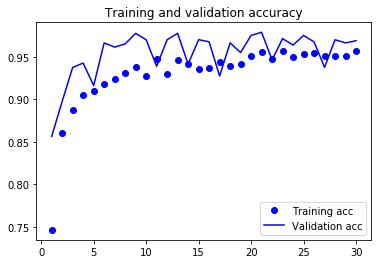

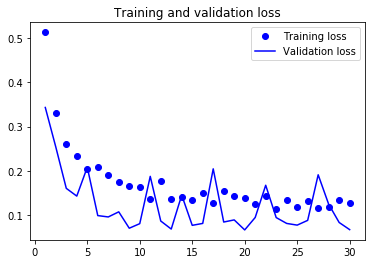

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
def predict(image):
    im_np = np.asarray(image)
    im_array=np.expand_dims(im_np, axis=0) # need to do this since model.predict_classes takes array of images as input
    result = model.predict_classes(im_array)
    if result[0] == 1:
        return 'Dog'
    else:
        return 'Cat'

1/1 [==============================] - 0s
Cat


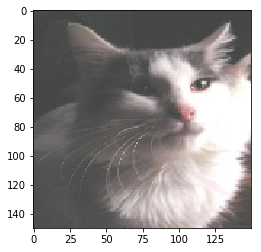

In [20]:
from PIL import Image

image_path = test_path + '/' + '12363.jpg'
pil_im = Image.open(image_path)
im = pil_im.resize((150,150))
plt.imshow(im)

print(predict(im))